# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [3]:
genome_ids = ['HG03727', 'HG03967', 'HG03869', 'HG03874', 'HG04098', 'HG04200', 'HG04211', 'HG04206', 'HG03965', 'HG03742', 'HG04214', 'HG03977', 'HG03775', 'HG04020', 'HG04017', 'HG04225', 'HG04062', 'HG03785', 'HG04023', 'HG04059', 'HG04014', 'HG04002', 'HG03782', 'HG04238', 'HG04212', 'HG04015', 'HG03866', 'HG03974', 'HG03968', 'HG03870', 'HG03789', 'HG03731', 'HG03864', 'HG03729', 'HG04061', 'HG04093', 'HG03969', 'HG03771', 'HG03717', 'HG04239', 'HG04022', 'HG03730', 'HG03960', 'HG04216', 'HG03971', 'HG03867', 'HG04096', 'HG03720', 'HG03777', 'HG04025', 'HG04094', 'HG03779', 'HG04063', 'HG03976', 'HG04060', 'HG04219', 'HG03861', 'HG04070', 'HG03770', 'HG03882', 'HG03784', 'HG03862', 'HG04090', 'HG03718', 'HG03714', 'HG03774', 'HG04056', 'HG04076', 'HG03780', 'HG03713', 'HG04054', 'HG04018', 'HG03772', 'HG04198', 'HG03787', 'HG04080', 'HG03781', 'HG03868', 'HG04209', 'HG03778', 'HG03871', 'HG03790', 'HG03872', 'HG04019', 'HG03716', 'HG04001', 'HG03786', 'HG03963', 'HG03863', 'HG04118', 'HG03773', 'HG03973', 'HG03792', 'HG03873', 'HG03875', 'HG04235', 'HG04202', 'HG04026', 'HG04222', 'HG03978', 'HG03788']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [5]:
root_dir = join(Path.home(),"cp_als/populations")

In [6]:
infile = join(root_dir,"output/ITU/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/ITU/all.csv'

In [7]:
df = pd.read_csv(infile)

In [8]:
df = df[genome_ids + ['gene']]
df.head()

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788,gene
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,TARDBP


## Computer variant count per gene and per genome

In [9]:
sdf=df.groupby(["gene"]).sum()

In [10]:
sdf.head()

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03973,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,13,1,5,3,12,14,3,5,4,33,...,6,10,12,22,9,4,7,21,22,3
ANG,17,5,1,0,5,0,0,16,11,0,...,11,5,14,0,1,1,11,1,9,13
ATXN2,22,20,12,14,30,15,10,6,19,11,...,14,18,11,7,3,22,23,19,17,22
C19ORF12,12,12,10,3,10,6,8,5,13,7,...,9,4,7,9,8,10,8,9,8,11
C9ORF72,11,33,3,26,23,15,11,21,16,21,...,31,33,1,34,25,13,10,17,24,21


## Compute mean99

In [11]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [12]:
mean99.head()

,0
HG03727,18.545455
HG03967,13.828283
HG03869,13.313131
HG03874,13.343434
HG04098,10.838384


In [13]:
m99 = mean99.transpose()

In [14]:
m99

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03973,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788
0,18.545455,13.828283,13.313131,13.343434,10.838384,11.060606,11.646465,14.828283,13.191919,12.333333,...,11.616162,11.828283,13.656566,13.727273,14.484848,11.656566,13.929293,13.787879,13.979798,14.535354


## Name the row "mean99" to append to the dataframe 

In [15]:
m99.index=["mean99"]

In [16]:
m99.head()

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03973,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788
mean99,18.545455,13.828283,13.313131,13.343434,10.838384,11.060606,11.646465,14.828283,13.191919,12.333333,...,11.616162,11.828283,13.656566,13.727273,14.484848,11.656566,13.929293,13.787879,13.979798,14.535354


## Compute statistics per genome, across all genes

In [17]:
genome_stats= sdf.describe()

In [18]:
genome_stats.head()

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03973,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,51.000000,38.027778,36.611111,36.694444,29.805556,30.416667,32.027778,40.777778,36.277778,33.916667,...,31.944444,32.527778,37.555556,37.75000,39.833333,32.055556,38.305556,37.916667,38.444444,39.972222
std,169.705796,126.348834,152.835164,117.290073,121.833802,95.294244,125.135238,158.564653,112.976764,137.744354,...,125.162967,94.107381,118.968770,150.85137,168.066738,117.028432,155.207846,142.766418,149.462933,134.785223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.750000,1.000000,1.000000,2.000000,1.750000,2.000000,1.750000,1.750000,1.000000,2.000000,...,1.000000,3.750000,2.000000,1.00000,1.000000,1.000000,2.750000,1.750000,1.750000,2.000000


### Adding new rows for genomes to show variant statistics

In [19]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [20]:
genome_stats_df

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03973,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788
ALS2,13.000000,1.000000,5.000000,3.000000,12.000000,14.000000,3.000000,5.000000,4.000000,33.000000,...,6.000000,10.000000,12.000000,22.000000,9.000000,4.000000,7.000000,21.000000,22.000000,3.000000
ANG,17.000000,5.000000,1.000000,0.000000,5.000000,0.000000,0.000000,16.000000,11.000000,0.000000,...,11.000000,5.000000,14.000000,0.000000,1.000000,1.000000,11.000000,1.000000,9.000000,13.000000
ATXN2,22.000000,20.000000,12.000000,14.000000,30.000000,15.000000,10.000000,6.000000,19.000000,11.000000,...,14.000000,18.000000,11.000000,7.000000,3.000000,22.000000,23.000000,19.000000,17.000000,22.000000
C19ORF12,12.000000,12.000000,10.000000,3.000000,10.000000,6.000000,8.000000,5.000000,13.000000,7.000000,...,9.000000,4.000000,7.000000,9.000000,8.000000,10.000000,8.000000,9.000000,8.000000,11.000000
C9ORF72,11.000000,33.000000,3.000000,26.000000,23.000000,15.000000,11.000000,21.000000,16.000000,21.000000,...,31.000000,33.000000,1.000000,34.000000,25.000000,13.000000,10.000000,17.000000,24.000000,21.000000
CHCHD10,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,...,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CHMP2B,7.000000,0.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,5.000000,7.000000,...,9.000000,7.000000,10.000000,0.000000,13.000000,9.000000,11.000000,13.000000,9.000000,7.000000
CHRNA3,26.000000,19.000000,23.000000,6.000000,18.000000,23.000000,23.000000,22.000000,6.000000,18.000000,...,19.000000,17.000000,17.000000,18.000000,20.000000,28.000000,19.000000,19.000000,22.000000,18.000000
CREST,88.000000,82.000000,85.000000,4.000000,6.000000,6.000000,88.000000,3.000000,90.000000,89.000000,...,1.000000,87.000000,89.000000,7.000000,78.000000,90.000000,91.000000,88.000000,89.000000,7.000000
DAO,12.000000,1.000000,6.000000,10.000000,1.000000,3.000000,2.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,8.000000


### Compute per gene stats

In [21]:
gene_df = sdf.transpose().describe()

In [22]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,101.0,10.455446,9.089032,0.0,4.0,7.0,14.0,48.0
ANG,101.0,6.227723,6.100625,0.0,1.0,5.0,11.0,24.0
ATXN2,101.0,18.138614,16.376831,3.0,11.0,18.0,22.0,166.0
C19ORF12,101.0,9.722772,4.108817,2.0,7.0,10.0,12.0,21.0
C9ORF72,101.0,20.049505,10.333805,1.0,12.0,20.0,25.0,46.0
CHCHD10,101.0,0.940594,0.772292,0.0,0.0,1.0,1.0,3.0
CHMP2B,101.0,7.485149,5.027154,0.0,3.0,9.0,11.0,19.0
CHRNA3,101.0,17.247525,7.420790,5.0,13.0,18.0,23.0,31.0
CREST,101.0,46.396040,41.267440,0.0,4.0,74.0,87.0,104.0


In [23]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [24]:
rdf.head()

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03978,HG03788,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,13,1,5,3,12,14,3,5,4,33,...,22,3,101.0,10.455446,9.089032,0.0,4.0,7.0,14.0,48.0
ANG,17,5,1,0,5,0,0,16,11,0,...,9,13,101.0,6.227723,6.100625,0.0,1.0,5.0,11.0,24.0
ATXN2,22,20,12,14,30,15,10,6,19,11,...,17,22,101.0,18.138614,16.376831,3.0,11.0,18.0,22.0,166.0
C19ORF12,12,12,10,3,10,6,8,5,13,7,...,8,11,101.0,9.722772,4.108817,2.0,7.0,10.0,12.0,21.0
C9ORF72,11,33,3,26,23,15,11,21,16,21,...,24,21,101.0,20.049505,10.333805,1.0,12.0,20.0,25.0,46.0


In [25]:
rdf

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03978,HG03788,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,13,1,5,3,12,14,3,5,4,33,...,22,3,101.0,10.455446,9.089032,0.0,4.0,7.0,14.0,48.0
ANG,17,5,1,0,5,0,0,16,11,0,...,9,13,101.0,6.227723,6.100625,0.0,1.0,5.0,11.0,24.0
ATXN2,22,20,12,14,30,15,10,6,19,11,...,17,22,101.0,18.138614,16.376831,3.0,11.0,18.0,22.0,166.0
C19ORF12,12,12,10,3,10,6,8,5,13,7,...,8,11,101.0,9.722772,4.108817,2.0,7.0,10.0,12.0,21.0
C9ORF72,11,33,3,26,23,15,11,21,16,21,...,24,21,101.0,20.049505,10.333805,1.0,12.0,20.0,25.0,46.0
CHCHD10,1,1,1,3,0,2,1,1,0,2,...,1,1,101.0,0.940594,0.772292,0.0,0.0,1.0,1.0,3.0
CHMP2B,7,0,10,10,10,10,2,2,5,7,...,9,7,101.0,7.485149,5.027154,0.0,3.0,9.0,11.0,19.0
CHRNA3,26,19,23,6,18,23,23,22,6,18,...,22,18,101.0,17.247525,7.420790,5.0,13.0,18.0,23.0,31.0
CREST,88,82,85,4,6,6,88,3,90,89,...,89,7,101.0,46.396040,41.267440,0.0,4.0,74.0,87.0,104.0


# Plot bar chart of total variant counts per gene


In [26]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [27]:
gdf=df.groupby(["gene"]).count()

In [28]:
gdf

,POS
gene,
ALS2,217
ANG,46
ATXN2,446
C19ORF12,64
C9ORF72,129
CHCHD10,7
CHMP2B,92
CHRNA3,90
CREST,245


In [29]:
gdf.reset_index(inplace=True)

In [30]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [31]:
gdf

,gene,variant_count
0,ERBB4,5653
1,NEK1,753
2,ATXN2,446
3,FIG4,410
4,SETX,348
5,SPG11,335
6,CREST,245
7,ELP3,237
8,VAPB,227
9,ALS2,217


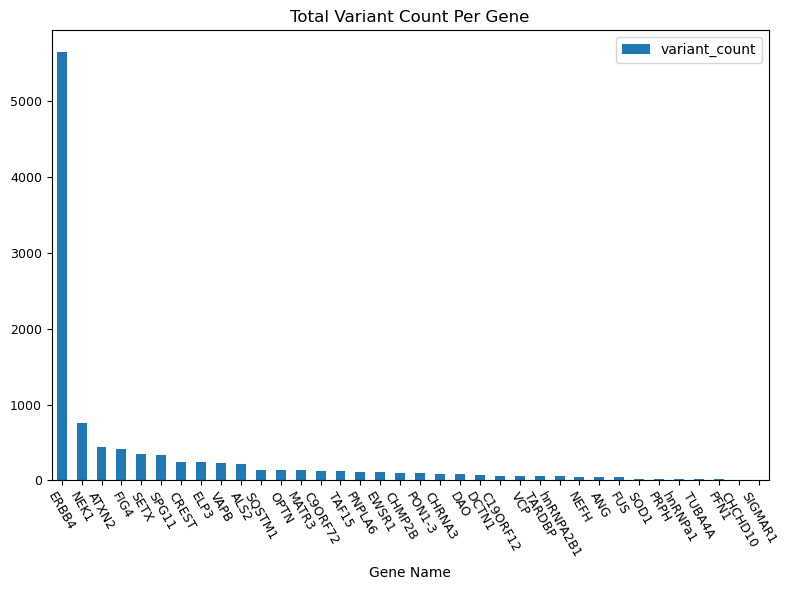

In [32]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [33]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'ATXN2', 'FIG4', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [34]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [35]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [36]:
hdf.reset_index(inplace=True)

In [37]:
hdf.head()

,index,count
0,HG03727,1836
1,HG03967,1369
2,HG03869,1318
3,HG03874,1321
4,HG04098,1073


In [38]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1357.3960396039604), 231.7345929811913)

## Find top and bottom genomes using mean & STD

In [39]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [40]:
len(top_genomes)

16

In [41]:
len(bottom_genomes)

16

In [42]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [43]:
sdf.head()

,HG03727,HG03967,HG03869,HG03874,HG04098,HG04200,HG04211,HG04206,HG03965,HG03742,...,HG03973,HG03792,HG03873,HG03875,HG04235,HG04202,HG04026,HG04222,HG03978,HG03788
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,13,1,5,3,12,14,3,5,4,33,...,6,10,12,22,9,4,7,21,22,3
ANG,17,5,1,0,5,0,0,16,11,0,...,11,5,14,0,1,1,11,1,9,13
ATXN2,22,20,12,14,30,15,10,6,19,11,...,14,18,11,7,3,22,23,19,17,22
C19ORF12,12,12,10,3,10,6,8,5,13,7,...,9,4,7,9,8,10,8,9,8,11
C9ORF72,11,33,3,26,23,15,11,21,16,21,...,31,33,1,34,25,13,10,17,24,21


In [44]:
tgdf= sdf.loc[top_genes]

In [45]:
tgdf_top_genomes = tgdf[top_genomes]

In [46]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [47]:
tgdf_top_genomes.head()

,HG03727,HG04017,HG04059,HG03974,HG03971,HG04063,HG03976,HG03861,HG03882,HG04090,HG03780,HG03713,HG03772,HG03872,HG04019,HG04118
gene,,,,,,,,,,,,,,,,
ERBB4,992,1043,972,1076,1130,1160,1275,1144,1113,1165,980,1120,1163,1144,1235,1143
NEK1,315,234,227,219,40,228,191,186,45,46,204,9,43,45,9,226
ATXN2,22,5,15,20,4,11,22,3,166,5,12,30,20,22,30,13
FIG4,31,44,20,13,49,71,51,44,50,43,23,48,44,57,59,39
SETX,46,6,41,67,45,27,25,8,5,23,19,20,51,27,19,22


In [48]:
tgdf_bot_genomes.head()

,HG04098,HG04200,HG04225,HG04002,HG04015,HG03729,HG03960,HG04025,HG03779,HG04219,HG03770,HG03714,HG04076,HG03787,HG04209,HG04001
gene,,,,,,,,,,,,,,,,
ERBB4,738,540,543,559,265,698,643,493,676,724,729,548,689,681,661,667
NEK1,13,230,210,41,11,42,4,44,12,43,39,13,43,43,9,40
ATXN2,30,15,11,9,18,9,21,25,7,12,10,20,10,22,12,11
FIG4,40,35,22,21,51,64,36,53,44,41,30,42,38,43,1,38
SETX,26,21,28,39,31,49,19,50,7,6,7,53,46,50,30,53


## Plot stacked bar chart for top genes & top genomes

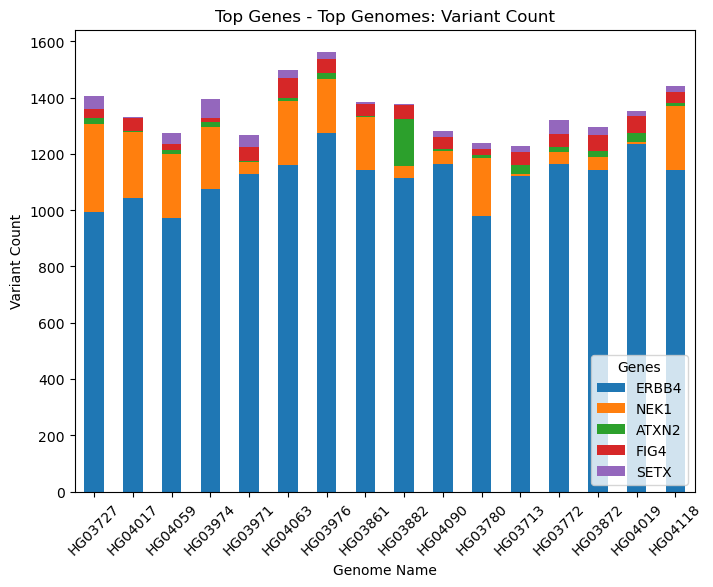

In [49]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

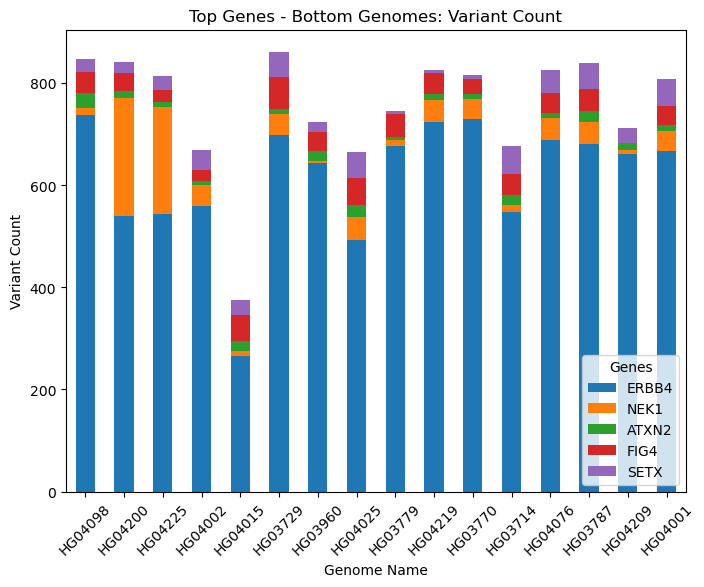

In [50]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()